In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

df = pd.read_csv('/workspaces/D2I-Jupyter-Notebook-Tools/ml-data science tutorials/data/diabetes.csv')

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
# Select features
features = ['Pregnancies',
            'Glucose', 
            'BloodPressure',
            'SkinThickness',
            'Insulin',	
            'BMI',
            'DiabetesPedigreeFunction',
            'Age']
X = df[features]
y = df['Outcome']

# Make four different dataframes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [3]:
# Initialise model class
lr = LogisticRegression(random_state=1)

# Fit model to data (train)
lr.fit(X_train, y_train)

# Predict using model (test)
y_pred = lr.predict(X_test)

# Create confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[89, 10],
       [24, 31]])

Text(0.5, 427.9555555555555, 'Predicted label')

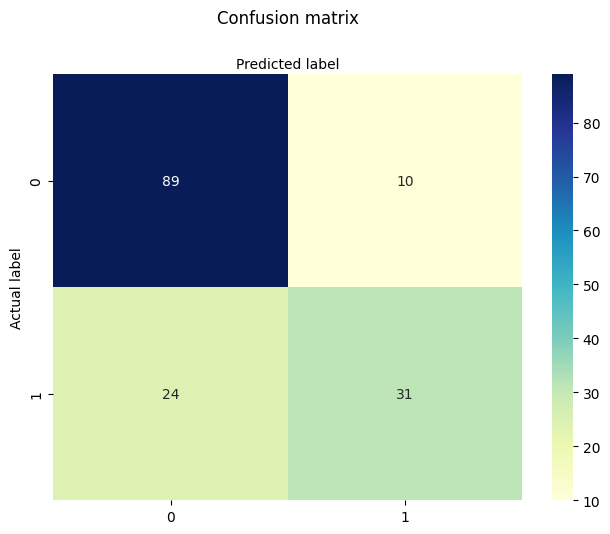

In [4]:
# Make plot for confusion matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [5]:
# Find accuracy of our model
from sklearn.metrics import classification_report

target_names = ['without diabetes', 'with diabetes']

output_report = classification_report(y_test, y_pred, target_names = target_names, output_dict=True)
print(output_report['accuracy'])

                  precision    recall  f1-score   support

without diabetes       0.79      0.90      0.84        99
   with diabetes       0.76      0.56      0.65        55

        accuracy                           0.78       154
       macro avg       0.77      0.73      0.74       154
    weighted avg       0.78      0.78      0.77       154



The accuracy of our model for predicting if someone does NOT have diabetes is 84%, but only 65% for predicting if someone DOES have diabetes, which isn't so good!
We now need to whittle down the features, and combinations of features, to see which is the best combination at predicting diabetes.

In [7]:
import itertools

combinations = []

# From the list of features, give me every combination of length x. We make a for loop to run this for every x from 1 to x
# There are 8 features in our list, so we use 1 to 9 in our loop
for i in range(1, 9):
    combs = itertools.combinations(features, i)
    combinations.extend(combs) # Add combs to the list 'combinations'
print(combinations)

[('Pregnancies',), ('Glucose',), ('BloodPressure',), ('SkinThickness',), ('Insulin',), ('BMI',), ('DiabetesPedigreeFunction',), ('Age',), ('Pregnancies', 'Glucose'), ('Pregnancies', 'BloodPressure'), ('Pregnancies', 'SkinThickness'), ('Pregnancies', 'Insulin'), ('Pregnancies', 'BMI'), ('Pregnancies', 'DiabetesPedigreeFunction'), ('Pregnancies', 'Age'), ('Glucose', 'BloodPressure'), ('Glucose', 'SkinThickness'), ('Glucose', 'Insulin'), ('Glucose', 'BMI'), ('Glucose', 'DiabetesPedigreeFunction'), ('Glucose', 'Age'), ('BloodPressure', 'SkinThickness'), ('BloodPressure', 'Insulin'), ('BloodPressure', 'BMI'), ('BloodPressure', 'DiabetesPedigreeFunction'), ('BloodPressure', 'Age'), ('SkinThickness', 'Insulin'), ('SkinThickness', 'BMI'), ('SkinThickness', 'DiabetesPedigreeFunction'), ('SkinThickness', 'Age'), ('Insulin', 'BMI'), ('Insulin', 'DiabetesPedigreeFunction'), ('Insulin', 'Age'), ('BMI', 'DiabetesPedigreeFunction'), ('BMI', 'Age'), ('DiabetesPedigreeFunction', 'Age'), ('Pregnancies',

In [11]:
accuracy = 0
best_X = 0

for feature_set in combinations:
    X = df[list(feature_set)]
    y = df['Outcome']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    lr = LogisticRegression(random_state=1)
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    output_report = classification_report(y_test, y_pred, target_names = target_names, output_dict=True)
    if output_report['accuracy'] > accuracy:
        accuracy = output_report['accuracy']
        best_X = list(feature_set)
        lr_best = lr


/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/codespace/.local/lib/p

In [12]:
plt.clf()
print(best_X, accuracy)

y_pred = lr_best.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

['Glucose', 'BMI', 'DiabetesPedigreeFunction'] 0.7922077922077922


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Age
- BloodPressure
- Insulin
- Pregnancies
- SkinThickness


<Figure size 640x480 with 0 Axes>